# Trabajo Práctico 1 - Cálculo de Ranking Page

## Enunciado

### Pregunta 1 - ¿Por que la matriz A definida en (4) es equivalente a $p \ \mathbf{W} \ \mathbf{D} + e \ z^t$ ? Justificar.

# Variables y Componentes

## Variables:

- **p**: Probabilidad que está entre 0 y 1.

- **W**: Es la matriz de conexión:
    - Si `w[i,j] = 1`, entonces `j` tiene un enlace hacia la página `i`.
    - Si `w[i,j] = 0`, entonces `j` NO tiene un enlace hacia la página `i`.
    - Si `i = j`, entonces `w[i,j] = 0`, es decir, toda su diagonal es 0 porque ignoramos autolinks.

- **D**: Es la matriz de importancia:
    - Se calcula a través de los grados, como el grado de la página `j`, que sería `c_j = sumatoria(i=1,n,w[i.j])`.
    - Representa la cantidad de enlaces salientes de `j`.
    - La matriz `D` se compone de `d[j,j]`:
        - Si `c_j != 0`, entonces `1/c_j`.
        - En otro caso, 0.
    - Es decir, la diagonal de `D` es pura 0 o 1/c_j, y las demás variables `d[i,j]` donde `i!=j` son 0.

- **e**: Es un vector columna compuesto por 1.

- **z transpuesta**: Es un vector columna que ahora es un vector fila y se compone de `z[j]`.
    - Si `c_j != 0`, entonces `(1-p)/n`.
    - En otro caso, `1/n`.

## Componentes de A:

- Los componentes `a[i,j]` de la matriz `A` se calculan de la siguiente manera:
    - Si `c_j != 0`, entonces `(1-p)/n +  (p * w[i,j])/c_j`.
    - En otro caso, `1/n`.

## Casos a considerar:

### Caso 1: Todos los `c_j = 0`

En este caso:
- `p` queda igual.
- `W` sería una matriz `n x n` con puros 0s porque cualquier link que `j` funcione cambiaría un `c_j` y se asume que todos los `c_j` son 0.
- `D` sería una matriz `n x n` con puros 0s porque si `c_j` es 0, las diagonales serán 0, y el resto ya era 0.
- `e` se mantiene igual.
- `z transpuesta` es un vector fila hecho por  1/n.

En ese caso:
`p * W@D + e @ z transpuesta` que en rango es 
`1 x 1 * n x n * n x n + n x 1 * 1 x n =  n x n`
Cumple con el rango de A siempre, pero los `a[i,j]` estarían compuestos por:

- `a[i,j] = 0 + (1) * (1/n) = 1/n` con `c_j = 0` (cumpliendo lo pedido en (4)).

### Caso 2: Todos los `c_j != 0`

En este caso:
- `p` queda igual.
- `W` sería una matriz `n x n` con 1 y 0 en los `w[i,j]`, excepto en la diagonal que sería todo 0 y que en toda fila haya al menos un 1 que conecte en un link para hacer que `c_j` nunca sea 0.
- `D` sería una matriz `n x n` con la diagonal compuesta de 1/c_j y el resto 0.
- `e` se mantiene igual.
- `z transpuesta` es un vector fila hecho por  (1-p)/n.

`p * W@D + e @ z transpuesta` que de rango es
`1 x 1 * n x n * n x n + n x 1 * 1 x n =  n x n`
Cumple con el rango de A siempre, pero los `a[i,j]` estarían compuestos por:
- `a[i,j] = p * w[i,j] * 1/c_j + 1 * (1-p)/n` con `c_j != 0` (cumpliendo lo pedido en (4)).

Si juntamos estos 2 casos, tenemos que:
- `a[i,j] = 0 + (1) * (1/n) = 1/n` con `c_j = 0` (cumpliendo lo pedido en (4)).
- `a[i,j] = p * w[i,j] * 1/c_j + 1 * (1-p)/n` con `c_j != 0` (cumpliendo lo pedido en (4)).

Demostrando la equivalencia pedida

### Pregunta 2 -  ¿Cómo se garantiza existencia de la factorización $LU$? ¿ La matriz $(\mathbf{I} - p \ \mathbf{W} \ \mathbf{D})$ está bien condicionada? ¿Cómo influye el valor de $p$?

1. En A me garantizo que es LU debido a que en ningún momento la diagonal puede ser 0 por como está compuesta la misma.

2. Para ver si está bien condicionada primero digo:
   - I - p * W @ D = M (solo para comodidad)
   - La matriz M se compone de:
       1) 1 en las diagonales, o sea 1 en M[i,j] donde i == j
       2) donde i!=j:
           - si cj != 0 entonces M[i,j] = - (p * W[i,j]/cj)
           - en otro caso es 0
   - Dividamos en dos casos para M:
       - si cj = 0 (en todos los j):
           1) si pasa eso, M solo tendrá una diagonal compuesta de 1
           2) M sería la IDENTIDAD
           3) La condición de M en ese caso sería 1 (sea en 1, infinito o 2)
       - si cj != 0 (en todos los j):
           - ahora con condición infinito:
               - tomo norma-inf(M) = la máxima de las sumas por fila a módulo
               - creo un Msingular tal que aplicando norma-inf(M-Msingular) = 1
               - puedo decir que la máxima de las sumas por fila a módulo de M <= cond(M)
           - ahora con condición 1:
               - tomo norma-1(M) = la máxima de las sumas por columna a módulo
               - creo un Msingular tal que aplicando norma-1(M-Msingular) = 1
               - puedo decir que la máxima de las sumas por columna a módulo de M <= cond(M)
       - juntaré ambos casos donde algunos cj = 0 y otros no:
          -  los casos Diferentes casos son:
               - la máxima de las sumas por fila a módulo de M <= cond(M) infinito
               - la máxima de las sumas por columna a módulo de M <= cond(M) 1
               - Identidad
   - Llego a la conclusión de que está mal condicionada porque siempre sera 1 o mayor a 1 
3. p influye en los valores donde este pueda acceder, o sea, donde cj!=0, siendo un número entre 0 y 1 pero que nunca toque los enteros haciendo que (p * W[i,j]/cj) dé un resultado más chico o más grande alterando al final la suma final en la condición siempre superando a 1, pero por cuanto sería ver con p.

---

## Implementación

Implementar la factorización $LU$ para resolver el sistema de ecuaciones (6) que permite hallar la solución buscada (es decir, el ranking de páginas). Se podrá utilizar la función **scipy.linalg.solve_triangular** para resolver sistemas triangulares.

En el siguiente cuerpo de la notebook se genera un test que va a evaluar la función que resuelve el sistema a través de un test unitario. La resolución debe realizarse en el archivo **funciones.py** que acompaña el **template-alumnos**.

In [1]:
from funciones import *

### Test Unitario
En el archivo funciones.py hay que implementar la función que obtienen el ranking de las páginas.
Se espera que el llamado a la siguiente función arroje un valor esperado

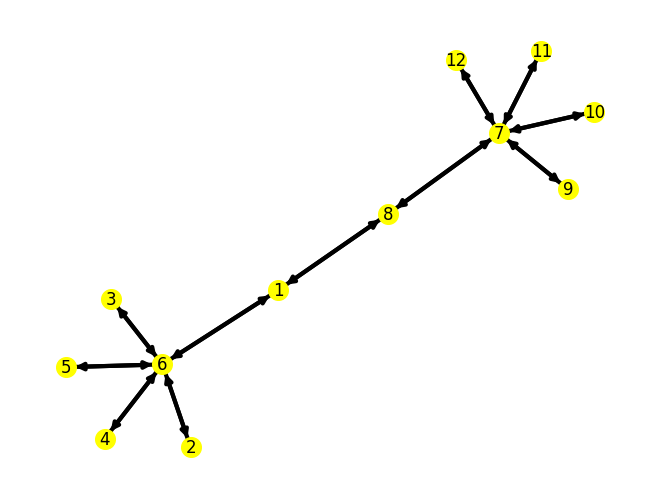

**************************************************
Test unitario 1
BIEN! - Paso correctamente el test unitario
**************************************************


In [2]:
#ARCHIVOS DE ENTRADA
archivo_test = './tests/test_dosestrellas.txt'
    
#CARGA DE ARCHIVO EN GRAFO
W = leer_archivo(archivo_test)

dibujarGrafo(W, print_ejes=False)

# defino la probabilidad de salto de continuar los links de la pagina actual
p = 0.5
# Realizo el test unitario para el calculo del mayor score, que pruebe que el codigo funciona correctamente.
print('*'*50)
print('Test unitario 1')
try:
    assert(np.isclose(obtenerMaximoRankingScore(W, p), 0.18115942))
except:
    print('OUCH!! - No paso el test unitario')
else:
    print('BIEN! - Paso correctamente el test unitario')
print('*'*50)

### Test Unitarios Adicionales

El grupo **deberá** proponer al menos 3 instancias de prueba no triviales, dos de las cuales deben ser de tipo TODOS LOS NODOS CONECTADOS, y otra de tipo NINGUNO CONECTADO. La tercera instancia queda a criterio del grupo.

Para el análisis, guiarse y responder las siguientes preguntas: 

* ¿Cómo es el ranking obtenido en cada caso de acuerdo a la estructura del grafo páginas? 
* ¿Qué conclusiones pueden sacar de la interpretación de los resultados?

Graficar los grafos usando las funciones en el **funciones.py**.

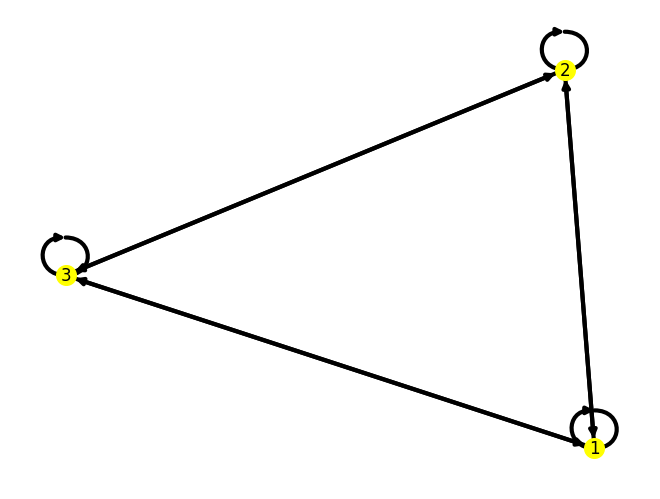

([3, 2, 1], array([[0.33333333],
       [0.33333333],
       [0.33333333]]))
([1, 3, 2], array([[0.33333333],
       [0.33333333],
       [0.33333333]]))
([3, 2, 1], array([[0.33333333],
       [0.33333333],
       [0.33333333]]))
([3, 2, 1], array([[0.33333333],
       [0.33333333],
       [0.33333333]]))


'Los rankings obtenidos son iguales, no hay diferencias de los flotantes cuando usamos diferentes casos de probabilidad. Esto se debe a que cuando armamos D para calcular ranking este estará compuesto por varios cj idénticos dejandonos estos rankings tan peculiares'

In [3]:
#Casos todos conectados
archivo_test = './tests/test_todos_unidos.txt'
    
#CARGA DE ARCHIVO EN GRAFO
W = leer_archivo(archivo_test)

dibujarGrafo(W, print_ejes=False)

#calculo diferentes p para entender mejor que es lo que pasa
p = [0.1, 0.25, 0.5, 0.75]

for i in p:
    print(calcularRanking(W,i))


"""Los rankings obtenidos son iguales, no hay diferencias de los flotantes cuando usamos diferentes casos de probabilidad. Esto se debe a que cuando armamos D para calcular ranking este estará compuesto por varios cj idénticos dejandonos estos rankings tan peculiares"""
 


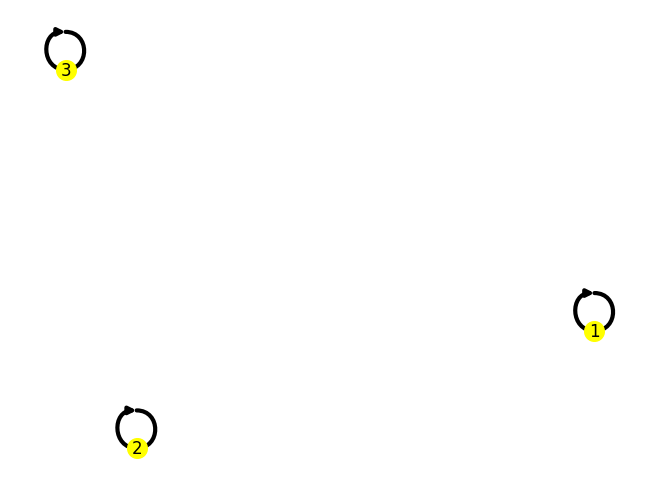

([3, 2, 1], array([[0.33333333],
       [0.33333333],
       [0.33333333]]))
([3, 2, 1], array([[0.33333333],
       [0.33333333],
       [0.33333333]]))
([3, 2, 1], array([[0.33333333],
       [0.33333333],
       [0.33333333]]))
([3, 2, 1], array([[0.33333333],
       [0.33333333],
       [0.33333333]]))


'Similar al caso de arriba pero sin ningun tipo de conexión entre los diferentes nodos. Los cj siguen siendo iguales y los rankings están conformados por triples empates.'

In [4]:
archivo_test = './tests/test_todos_desconectados.txt'
    
#CARGA DE ARCHIVO EN GRAFO
W = leer_archivo(archivo_test)

dibujarGrafo(W, print_ejes=False)

p = [0.1, 0.25, 0.5, 0.75]

for i in p:
    print(calcularRanking(W,i))
    
"""Similar al caso de arriba pero sin ningun tipo de conexión entre los diferentes nodos. Los cj siguen siendo iguales y los rankings están conformados por triples empates."""


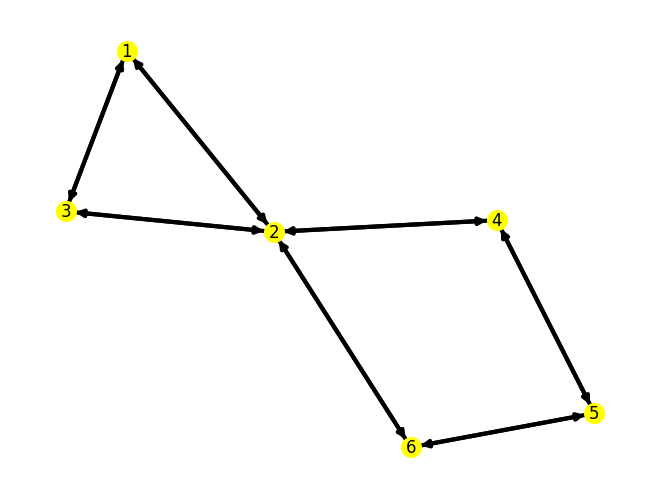

([5, 1, 6, 4, 2, 3], array([[0.16269889],
       [0.18255772],
       [0.16269889],
       [0.16287833],
       [0.16628783],
       [0.16287833]]))
([6, 1, 5, 4, 2, 3], array([[0.15742397],
       [0.2039356 ],
       [0.15742397],
       [0.15831843],
       [0.16457961],
       [0.15831843]]))
([6, 1, 5, 4, 2, 3], array([[0.15023474],
       [0.23474178],
       [0.15023474],
       [0.15258216],
       [0.15962441],
       [0.15258216]]))
([6, 1, 5, 3, 2, 4], array([[0.14509068],
       [0.26141338],
       [0.14509068],
       [0.14790494],
       [0.15259537],
       [0.14790494]]))


' Este grafo presenta 6 nodos, entre los cuales está el n° 2 que está conectado con otros 4 siendo el más importante. El resto de los nodos solo tiene 2 conexiones. El otro nodo destacable es el n° 5, que al no estar conectado con el n° 2 siempre es el segundo más importante. Los nodos n° 1 y 3 y los n° 4 y 6 van intercambiando posiciones en el ranking según va cambiando p '

In [5]:
archivo_test = './tests/test_especial.txt'
    
#CARGA DE ARCHIVO EN GRAFO
W = leer_archivo(archivo_test)

dibujarGrafo(W, print_ejes=False)

p = [0.1, 0.25, 0.5, 0.75]

for i in p:
    print(calcularRanking(W,i))

""" Este grafo presenta 6 nodos, entre los cuales está el n° 2 que está conectado con otros 4 siendo el más importante. El resto de los nodos solo tiene 2 conexiones. El otro nodo destacable es el n° 5, que al no estar conectado con el n° 2 siempre es el segundo más importante. Los nodos n° 1 y 3 y los n° 4 y 6 van intercambiando posiciones en el ranking según va cambiando p """


---

## Enunciado

Sobre los casos de test que se encuentran en el folder `tests`, se pide realizar los análisis siguientes para todos los grafos del folder.

### Análisis Cuantitativo

Para el análisis cuantitativo, se pide, como mínimo, estudiar los tiempos de procesamiento en función del tamaño del grafo de páginas y de la densidad del mismo. Para esto, se espera que presenten gráficos mostrando los tiempos de ejecución para obtener la solución en función de la cantidad de nodos/links de diferentes grafos de páginas aleatorios.


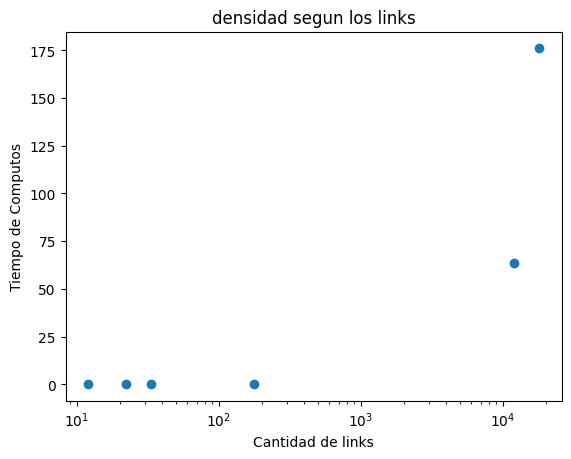

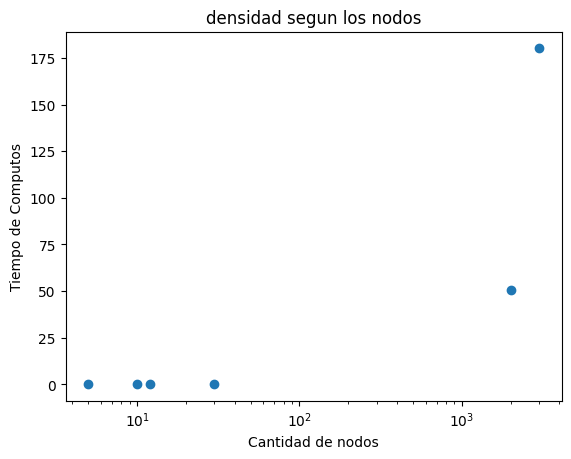

In [7]:
graficoCuantitativoLinks()
graficoCuantitativoNodos()


### Análisis Cualitativo

Para el análisis cualitativo se deberán estudiar los rankings obtenidos, en función de la estructura del grafo, y del valor de $p$. Para esto, se espera que presenten gráficos mostrando las probabilidades de las páginas mejor rankeadas en función del valor de $p$. 


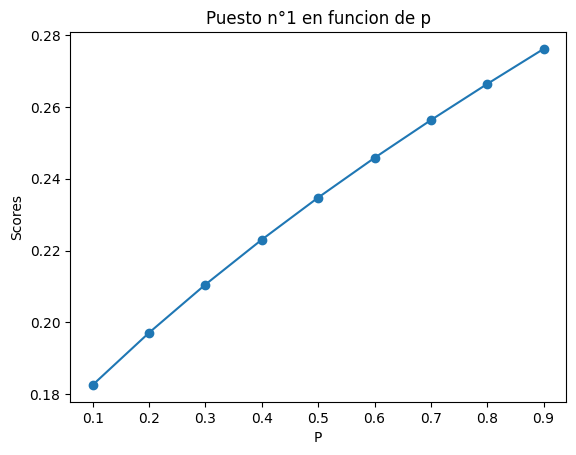

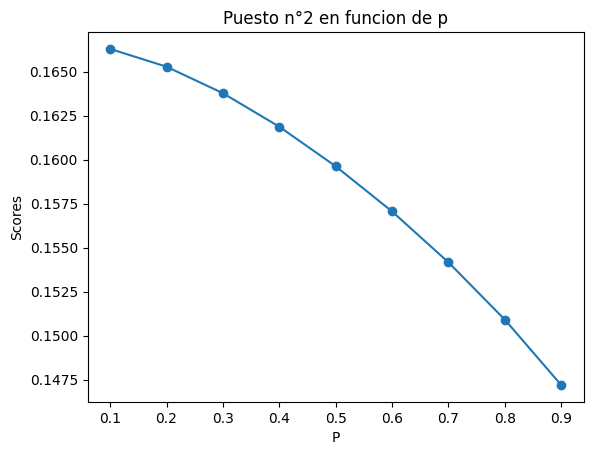

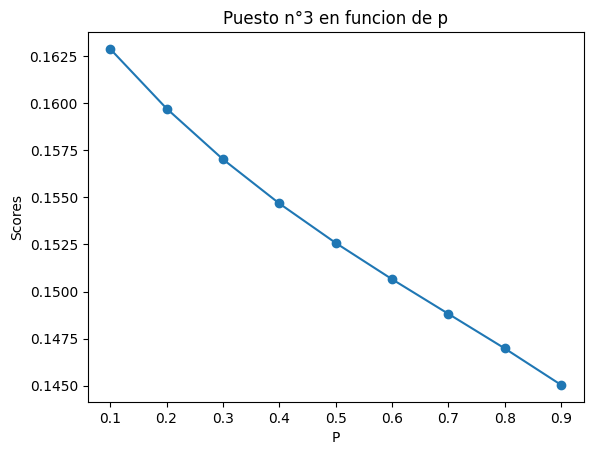

In [8]:
w = leer_archivo("./tests/test_especial.txt")
graficoCualitativo(w)
            

### Dos estrellas

Para el caso **test_dosestrellas.txt** se pregunta: 

¿Cuál es la mínima cantidad de links que se deben agregar para que la pagina correspondiente al nodo 1 quede primera en el ranking? ¿ Cómo se modificó la conectividad? Analizar.



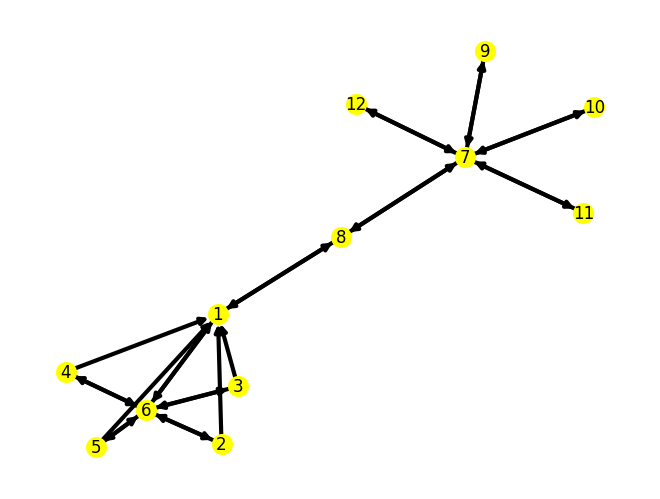

([1, 12, 11, 10, 9, 3, 2, 4, 8, 7, 6, 5], array([[0.1781686 ],
       [0.05365639],
       [0.05365639],
       [0.05365639],
       [0.05365639],
       [0.15983322],
       [0.16277329],
       [0.06879778],
       [0.05395039],
       [0.05395039],
       [0.05395039],
       [0.05395039]]))


'La minima cantidad de links que se pueden agregar para que 1 sea el más importante son 4. Elegimos los links (2 1 ,3 1 , 4 1, 5 1) los mas cercanos al 6, marcando una conectividad con tendencias al 1 muy cerrada. Además corroboramos con diferentes valores para p y la mínima cantidad de links sigue siendo 4'

In [9]:
#ARCHIVOS DE ENTRADA
archivo_test = './tests/test_dosestrellas_modificada.txt'
    
#CARGA DE ARCHIVO EN GRAFO
W = leer_archivo(archivo_test)

dibujarGrafo(W, print_ejes=False)
p = 0.5

print(calcularRanking(W,p))



"""La minima cantidad de links que se pueden agregar para que 1 sea el más importante son 4. Elegimos los links (2 1 ,3 1 , 4 1, 5 1) los mas cercanos al 6, marcando una conectividad con tendencias al 1 muy cerrada. Además corroboramos con diferentes valores para p y la mínima cantidad de links sigue siendo 4"""